In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

In [5]:
df=pd.read_excel('/content/new data nuclear.xlsx')

In [ ]:
df.head(10)

,Frequency,Nmax,GSenergy
0,8,0,-60.71127
1,8,2,-53.49089
2,8,4,-53.20289
3,8,6,-54.36966
4,10,0,-71.18457
5,10,2,-62.80802
6,10,4,-62.32927
7,10,6,-63.26534
8,12,0,-80.30895
9,12,2,-70.39914


Text(0, 0.5, 'GSenergy')

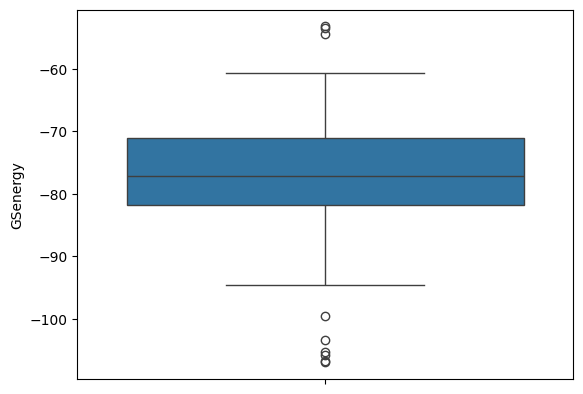

In [ ]:
sns.boxplot(data=df['GSenergy'])
plt.ylabel('GSenergy')

In [ ]:
df['z_GSenergy'] = np.abs(stats.zscore(df['GSenergy']))
outlGSenergy = list(np.where(np.abs(df['z_GSenergy']) > 3)[0])
print("GS energy Outliers: ", outlGSenergy)
print("Total outlier GS energy: ", len(outlGSenergy), "\n")

GS energy Outliers:  []
Total outlier GS energy:  0 



Text(0.5, 1.0, 'Correlation Between Variables')

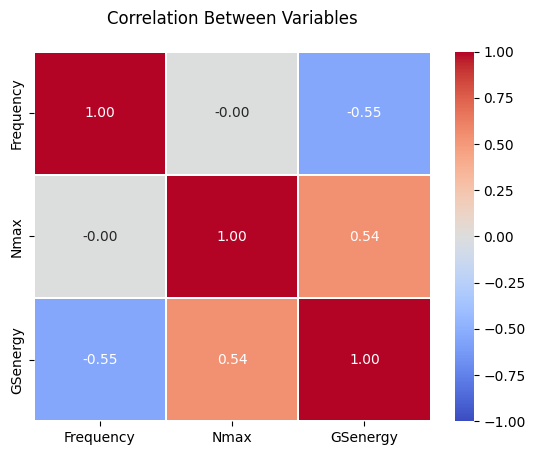

In [ ]:
df = df.drop(columns=[ 'z_GSenergy'])
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=20)


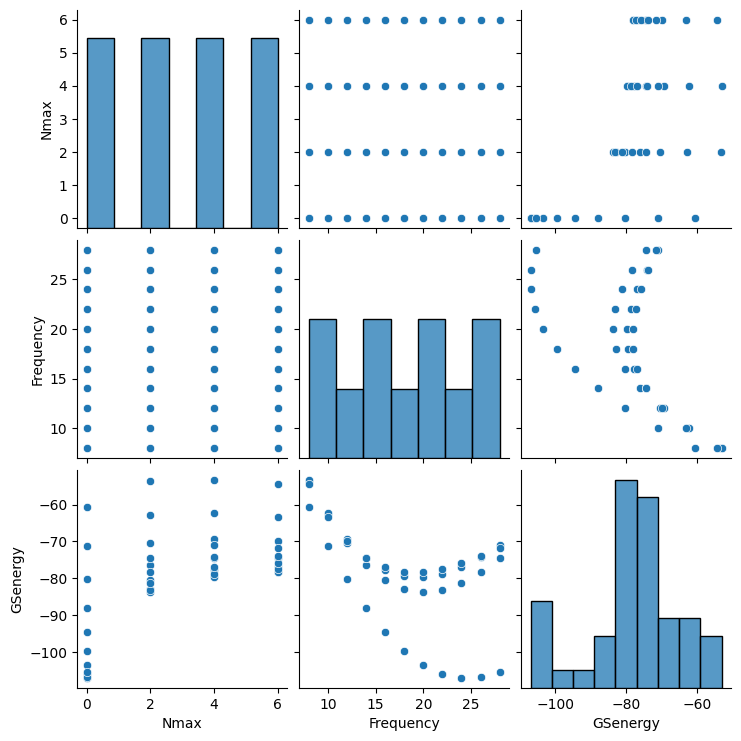

In [ ]:
df1 = df[['Nmax', 'Frequency', 'GSenergy']]
sns.pairplot(df1)

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [14]:


lm = smf.ols(formula='GSenergy ~ Frequency + Nmax ', data=df).fit()
comparison = pd.DataFrame({"y_test": y_test, "y_predict": y_predict})
print("Summary: ", lm.summary())
print("R Squared Mean: ", np.mean(scores))
print("RMSE mean: ", np.mean(rmse_list))

Summary:                              OLS Regression Results                            
Dep. Variable:               GSenergy   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     30.28
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           8.39e-09
Time:                        04:35:18   Log-Likelihood:                -156.83
No. Observations:                  44   AIC:                             319.7
Df Residuals:                      41   BIC:                             325.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -66.8465      4.406    -15.17

In [15]:
X1 = df.iloc[:, :-2].values
y1 = df.iloc[:, -1].values
lrmodel1 = LinearRegression()
for train_index, test_index in cv.split(X1):
    X_train1, X_test1, y_train1, y_test1 = X1[train_index], X1[test_index], y1[train_index], y1[test_index]
    fit = lrmodel1.fit(X_train1, y_train1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

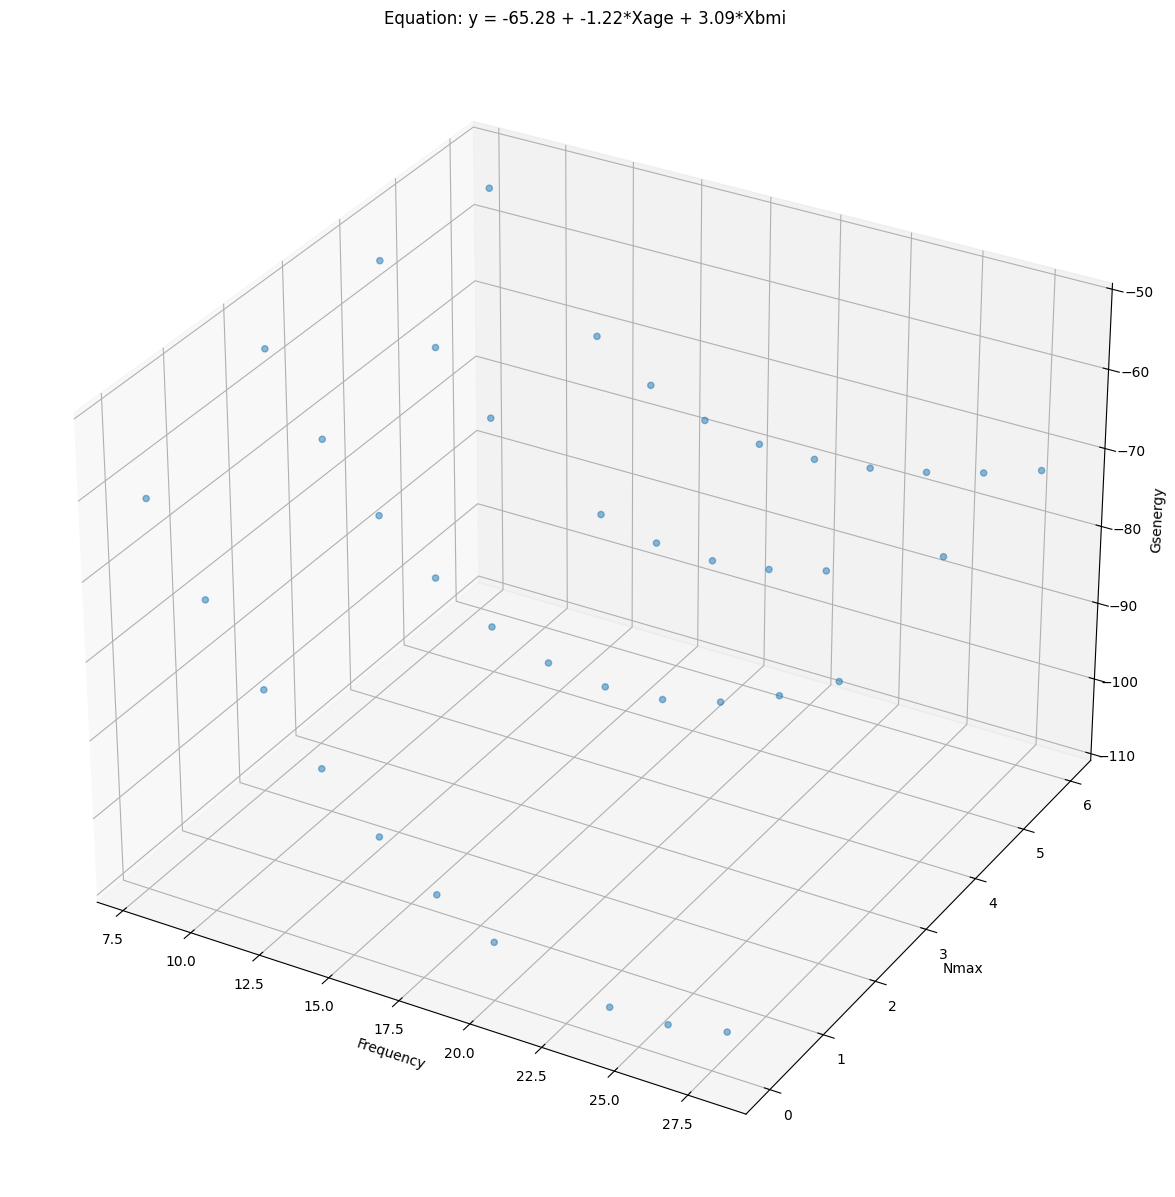

In [17]:
coefs = lrmodel.coef_
intercept = lrmodel.intercept_
x = X[:, 0] #age
y = X[:, 1] #bmi
z = y
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker='o', alpha=0.5)
ax.set_xlabel("Frequency")
ax.set_ylabel("Nmax")
ax.set_zlabel("Gsenergy")
ax.set_title("Equation: y = {:.2f} + {:.2f}*Xage + {:.2f}*Xbmi ".format(intercept, coefs[0], coefs[1]))
xx, yy = np.meshgrid(x, y)
exog1 = pd.DataFrame({'age':xx.ravel(), 'bmi':yy.ravel()})
out=fit.predict(exog1)
ax.plot_surface(xx, yy, out.reshape(xx.shape), alpha=0.1)
ax.view_init(10, 30)
plt.show()


In [18]:
def prediction(Frequency, Nmax):
    """Predicts GSenergy using Frequency and Nmax as input.

    Args:
        Frequency (float): The frequency value.
        Nmax (float): The Nmax value.

    Returns:
        float: The predicted GSenergy value.
    """
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({'Frequency': [Frequency], 'Nmax': [Nmax]})

    # Make the prediction using the trained model
    predicted_gsenergy = lrmodel.predict(input_data)

    # Print the predicted GSenergy
    print(f"Predicted GSenergy for Frequency: {Frequency}, Nmax: {Nmax} is: {predicted_gsenergy[0]}")

    return predicted_gsenergy[0]  # Return the predicted value

In [19]:
# Example usage:
predicted_gsenergy = prediction(Frequency=20, Nmax=2)

Predicted GSenergy for Frequency: 20, Nmax: 2 is: -83.48688455950767


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [37]:
predicted_gsenergy = prediction(Frequency=18, Nmax=8)

Predicted GSenergy for Frequency: 18, Nmax: 8 is: -62.47892447044063


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# ** Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [1]:
def prediction(Frequency, Nmax):

    # Create a DataFrame with the input values
    input_data = pd.DataFrame({'Frequency': [Frequency], 'Nmax': [Nmax]})

    # Create and train a DecisionTreeRegressor model
    dt_model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters here
    dt_model.fit(df[['Frequency', 'Nmax']], df['GSenergy'])  # Train using existing data

    # Make the prediction
    predicted_gsenergy = dt_model.predict(input_data)

    # Print the predicted GSenergy
    print(f"Predicted GSenergy for Frequency: {Frequency}, Nmax: {Nmax} is: {predicted_gsenergy[0]}")

    return predicted_gsenergy[0]  # Return the predicted value

In [20]:
# Example usage:
predicted_gsenergy = prediction(Frequency=20, Nmax=2)

Predicted GSenergy for Frequency: 20, Nmax: 2 is: -83.48688455950767


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
predicted_gsenergy = prediction(Frequency=8, Nmax=8)

Predicted GSenergy for Frequency: 8, Nmax: 8 is: -54.36966


In [ ]:
predicted_gsenergy = prediction(Frequency=18, Nmax=8)

Predicted GSenergy for Frequency: 18, Nmax: 8 is: -78.19678


In [21]:
from sklearn.neural_network import MLPRegressor

# Create and train the model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), random_state=42)  # Adjust architecture as needed
nn_model.fit(df[['Frequency', 'Nmax']], df['GSenergy'])

# Make predictions (similar to Decision Tree example)
predicted_gsenergy = nn_model.predict(input_data)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'input_data' is not defined

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is in a pandas DataFrame called 'df' with columns 'Frequency', 'Nmax', and 'GSenergy'
X = df[['Frequency', 'Nmax']]  # Features
y = df['GSenergy']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Now you can use the trained model to predict energy for new data points
# Example:
new_data = [[20, 4]]  # New Frequency and Nmax values
new_data_scaled = scaler.transform(new_data)
predicted_energy = svm_model.predict(new_data_scaled)
print(f"Predicted Energy: {predicted_energy[0]}")

Mean Squared Error: 256.13107612354594
R-squared: -0.5736087779525942
Predicted Energy: -79.10483537821865


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
for i in range (8,28):
  new_data = [[i, 8]]  # New Frequency and Nmax values
  new_data_scaled = scaler.transform(new_data)
  predicted_energy = svm_model.predict(new_data_scaled)
  print(f"Predicted Energy for {i,8}: {predicted_energy[0]}")

Predicted Energy for (8, 8): -73.28430645462129
Predicted Energy for (9, 8): -73.37001737320807
Predicted Energy for (10, 8): -73.53267238098202
Predicted Energy for (11, 8): -73.76847096245848
Predicted Energy for (12, 8): -74.06648281882642
Predicted Energy for (13, 8): -74.40906894596722
Predicted Energy for (14, 8): -74.77317995346118
Predicted Energy for (15, 8): -75.13243032660466
Predicted Energy for (16, 8): -75.45972182254624
Predicted Energy for (17, 8): -75.73009233788981
Predicted Energy for (18, 8): -75.92341656490976
Predicted Energy for (19, 8): -76.02659204334466
Predicted Energy for (20, 8): -76.03490950448574
Predicted Energy for (21, 8): -75.95242028834335
Predicted Energy for (22, 8): -75.79125808048838
Predicted Energy for (23, 8): -75.57002366780053
Predicted Energy for (24, 8): -75.31147475086699
Predicted Energy for (25, 8): -75.03985593997287
Predicted Energy for (26, 8): -74.77824182650605
Predicted Energy for (27, 8): -74.54624336573194


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

In [36]:
for i in range (8,28,2):
  new_data = [[i, 6]]  # New Frequency and Nmax values
  new_data_scaled = scaler.transform(new_data)
  predicted_energy = svm_model.predict(new_data_scaled)
  print(f"Predicted Energy for {i,8}: {predicted_energy[0]}")

Predicted Energy for (8, 8): -71.16734661372097
Predicted Energy for (10, 8): -71.70044267092669
Predicted Energy for (12, 8): -72.8818074413998
Predicted Energy for (14, 8): -74.4711933069208
Predicted Energy for (16, 8): -76.0458796151931
Predicted Energy for (18, 8): -77.15373883473413
Predicted Energy for (20, 8): -77.49549025409529
Predicted Energy for (22, 8): -77.04476194581497
Predicted Energy for (24, 8): -76.04468328762134
Predicted Energy for (26, 8): -74.88653599834153


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

In [ ]:
new_data = [[20, 4]]  # New Frequency and Nmax values
new_data_scaled = scaler.transform(new_data)
predicted_energy = svm_model.predict(new_data_scaled)
print(f"Predicted Energy: {predicted_energy[0]}")

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# ... (Data preparation and splitting remain the same) ...

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],  # Explore different kernels
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],  # Loss function tolerance
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# ... (Prediction and evaluation remain the same, using best_svm_model) ...

In [34]:
# Assuming you have already trained the best_svm_model using GridSearchCV as shown in the previous response

# New data points for prediction
new_data = [[20, 8], [18, 8], [10, 8]]  # Frequency, Nmax values

# Scale the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Make predictions using the best_svm_model
predicted_energies = best_svm_model.predict(new_data_scaled)

# Print the predictions
for i, data_point in enumerate(new_data):
    print(f"Predicted Energy for Frequency={data_point[0]}, Nmax={data_point[1]}: {predicted_energies[i]}")

Predicted Energy for Frequency=20, Nmax=8: -71.55523826523616
Predicted Energy for Frequency=18, Nmax=8: -71.95683051723455
Predicted Energy for Frequency=10, Nmax=8: -65.70317400152453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
